# 3.4.1 线性回归———女性身高与体重数据分析

## 1 业务理解

In [1]:
#略，详细内容见教材。# 本文件为教材《数据分析理论与实践：基于经典算法及Python编程实现》（朝乐门主编，机械工业出版社，2022年）的配套代码。                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              #略

## 2 数据读入

In [2]:
import os
print(os.getcwd()) #查看当前工作目录

c:\clm\00 BDA培训\第3章 回归分析


In [3]:
import pandas as pd
import numpy as np    
df_women = pd.read_csv('women.csv', index_col=0,header=0)
df_women.tail(3)


,height,weight
13,70,154
14,71,159
15,72,164


## 3 数据理解

In [4]:
df_women.shape #形状

(15, 2)

In [5]:
df_women.columns #列名

Index(['height', 'weight'], dtype='object')

In [6]:
df_women.describe() #进行描述性分析

,height,weight
count,15.000000,15.000000
mean,65.000000,136.733333
std,4.472136,15.498694
min,58.000000,115.000000
25%,61.500000,124.500000
50%,65.000000,135.000000
75%,68.500000,148.000000
max,72.000000,164.000000


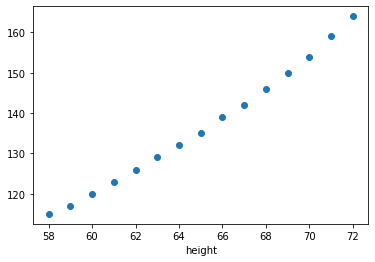

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df_women["height"], df_women["weight"])
plt.xlabel("height")
plt.show()

## 4 数据准备

In [8]:
X = df_women[["height"]]
y = df_women["weight"]

In [9]:
type(X)

pandas.core.frame.DataFrame

In [10]:
y=np.ravel(y)

In [11]:
type(y)

numpy.ndarray

## 5 模型类型的选择与超级参数的设置

In [12]:
import statsmodels.api as sm

In [13]:
X

,height
1,58
2,59
3,60
4,61
5,62
6,63
7,64
8,65
9,66
10,67


In [14]:
import statsmodels.api as sm
X=sm.add_constant(X) 
X

,const,height
1,1.0,58
2,1.0,59
3,1.0,60
4,1.0,61
5,1.0,62
6,1.0,63
7,1.0,64
8,1.0,65
9,1.0,66
10,1.0,67


In [15]:
#报警告原因分析
#type(X)，返回值为pandas.core.series.Series，说明目前X为系列
#sm.add_constant?的返回值为，该函数的data必须为array like
    #所以：改正方法为：X.to_numpy()

In [16]:
#重写
import statsmodels.api as sm
X_add_const=sm.add_constant(X.to_numpy()) 
X_add_const


array([[ 1., 58.],
       [ 1., 59.],
       [ 1., 60.],
       [ 1., 61.],
       [ 1., 62.],
       [ 1., 63.],
       [ 1., 64.],
       [ 1., 65.],
       [ 1., 66.],
       [ 1., 67.],
       [ 1., 68.],
       [ 1., 69.],
       [ 1., 70.],
       [ 1., 71.],
       [ 1., 72.]])

In [17]:
myModel = sm.OLS(y, X_add_const)

## 6 训练具体模型及查看其统计量

In [18]:
results = myModel.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           1.09e-14
Time:                        22:10:48   Log-Likelihood:                -26.541
No. Observations:                  15   AIC:                             57.08
Df Residuals:                      13   BIC:                             58.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.5167      5.937    -14.741      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [19]:
results.params

array([-87.51666667,   3.45      ])

## 7 模型优度的评价

In [20]:
results.rsquared

0.9910098326857505

## 8 建模前提假定条件的讨论

In [21]:
results.f_pvalue

1.0909729585997586e-14

In [22]:
sm.stats.stattools.durbin_watson(results.resid)

0.31538037486218257

In [23]:
sm.stats.stattools.jarque_bera(results.resid)

(1.659573064431037, 0.4361423787323734, 0.7893583826332502, 2.5963042257390643)

In [24]:
y_predict=results.predict()
y_predict

array([112.58333333, 116.03333333, 119.48333333, 122.93333333,
       126.38333333, 129.83333333, 133.28333333, 136.73333333,
       140.18333333, 143.63333333, 147.08333333, 150.53333333,
       153.98333333, 157.43333333, 160.88333333])

## 9 模型的优化与重新选择

Text(0, 0.5, '体重')

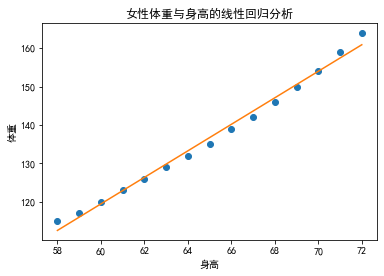

In [25]:
#plt.rcParams["font.family"] = 'Arial Unicode MS'
plt.rcParams['font.family']="simHei" #汉字显示
plt.plot(df_women["height"], df_women["weight"],"o")
plt.plot(df_women["height"], y_predict)
plt.title('女性体重与身高的线性回归分析')
plt.xlabel('身高')
plt.ylabel('体重')   

In [26]:
import pandas as pd
import numpy as np    


In [27]:
X = df_women[["height"]]
y = df_women["weight"]
X=np.column_stack((X, np.power(X,2), np.power(X,3)))
X

array([[    58,   3364, 195112],
       [    59,   3481, 205379],
       [    60,   3600, 216000],
       [    61,   3721, 226981],
       [    62,   3844, 238328],
       [    63,   3969, 250047],
       [    64,   4096, 262144],
       [    65,   4225, 274625],
       [    66,   4356, 287496],
       [    67,   4489, 300763],
       [    68,   4624, 314432],
       [    69,   4761, 328509],
       [    70,   4900, 343000],
       [    71,   5041, 357911],
       [    72,   5184, 373248]], dtype=int64)

In [28]:
X_add_const=sm.add_constant(X) 

X_add_const

array([[1.00000e+00, 5.80000e+01, 3.36400e+03, 1.95112e+05],
       [1.00000e+00, 5.90000e+01, 3.48100e+03, 2.05379e+05],
       [1.00000e+00, 6.00000e+01, 3.60000e+03, 2.16000e+05],
       [1.00000e+00, 6.10000e+01, 3.72100e+03, 2.26981e+05],
       [1.00000e+00, 6.20000e+01, 3.84400e+03, 2.38328e+05],
       [1.00000e+00, 6.30000e+01, 3.96900e+03, 2.50047e+05],
       [1.00000e+00, 6.40000e+01, 4.09600e+03, 2.62144e+05],
       [1.00000e+00, 6.50000e+01, 4.22500e+03, 2.74625e+05],
       [1.00000e+00, 6.60000e+01, 4.35600e+03, 2.87496e+05],
       [1.00000e+00, 6.70000e+01, 4.48900e+03, 3.00763e+05],
       [1.00000e+00, 6.80000e+01, 4.62400e+03, 3.14432e+05],
       [1.00000e+00, 6.90000e+01, 4.76100e+03, 3.28509e+05],
       [1.00000e+00, 7.00000e+01, 4.90000e+03, 3.43000e+05],
       [1.00000e+00, 7.10000e+01, 5.04100e+03, 3.57911e+05],
       [1.00000e+00, 7.20000e+01, 5.18400e+03, 3.73248e+05]])

In [29]:
myModel_updated = sm.OLS(y, X_add_const)

In [30]:
results_updated = myModel_updated.fit()
print(results_updated)
      

In [31]:
results_updated.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.679e+04
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           2.07e-20
Time:                        22:10:48   Log-Likelihood:                 1.3441
No. Observations:                  15   AIC:                             5.312
Df Residuals:                      11   BIC:                             8.144
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -896.7476    294.575     -3.044      0.011   -1545.102    -248.393
x1            46.4108     13.655      3.399      0.006      16.356      76.466
x2            -0.7462      0.211     -3.544      0.005      -1.210      -0.283
x3             0.0043      0.001      3.940      0.002       0.002       0.007
==============================================================================
Omnibus:                        0.028   Durbin-Watson:                   2.388
Prob(Omnibus):                  0.986   Jarque-Bera (JB):                0.127
Skew:                           0.049   Prob(JB):                        0.939
Kurtosis:                       2.561   Cond. No.                     1.25e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
print('查看斜率及截距项: ',results_updated.params)

查看斜率及截距项:  const   -896.747633
x1        46.410789
x2        -0.746184
x3         0.004253
dtype: float64


In [33]:
y_predict_updated=results_updated.predict()
y_predict_updated

array([114.63856209, 117.40676937, 120.18801264, 123.00780722,
       125.89166846, 128.86511168, 131.95365223, 135.18280543,
       138.57808662, 142.16501113, 145.9690943 , 150.01585147,
       154.33079796, 158.93944911, 163.86732026])

Text(0, 0.5, '体重')

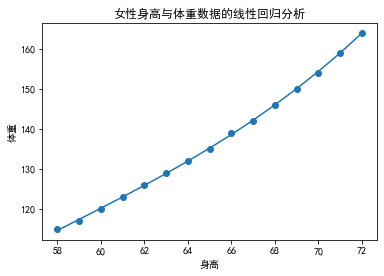

In [34]:
plt.rcParams['font.family']="simHei" 
#plt.rcParams["font.family"] = 'Heiti TC'
plt.scatter(df_women["height"], df_women["weight"])
plt.plot(df_women["height"], y_predict_updated)
plt.title('女性身高与体重数据的线性回归分析')
plt.xlabel('身高')
plt.ylabel('体重')   

## 10 模型的应用

In [35]:
#注意实参
h=63.5
results_updated.predict((1,h,np.power(h,2),np.power(h,3)))

array([130.39340008])